# Experimento 1: Modelo KNN

### Import das dependências

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Dataset

Leitura do dataset, já pré-processado e normalizado

In [2]:
train_data = pd.read_csv('./data/train_normalized_dataset.csv')
test_data = pd.read_csv('./data/test_normalized_dataset.csv')

In [3]:
train_data.head(10)

grupo    btsId btsNetNome    lat_x   lon_x  cch  azimuth  ponto_id  \
0      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      6604   
1      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      5515   
2      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      5049   
3      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      8737   
4      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      1203   
5      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      6952   
6      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      8875   
7      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      1926   
8      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      2641   
9      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0      3399   

   delay_1  delay_2  delay_3     lat_y      lon_y  indoor   rssi_id  \
0      5.0      3.0      2.0 -8.055786 -34.951505    True  rssi_1_1   
1      5.0      3.0      2.0 -8.055784 -34.951608    True  rssi_1_1   
2      5.0      3.0      2.0 -8.055506 -34.951693    True  rssi_1_1   
3      4.0      7.0      2.0 -8.050390 -34.959630   False  rssi_1_1   
4      5.0      3.0      2.0 -8.055380 -34.951736    True  rssi_1_1   
5      6.0      5.0      0.0 -8.055780 -34.956390   False  rssi_1_1   
6      3.0      4.0      3.0 -8.049710 -34.954640   False  rssi_1_1   
7      5.0      3.0      3.0 -8.055494 -34.951316    True  rssi_1_1   
8      5.0      3.0      3.0 -8.055684 -34.951331    True  rssi_1_1   
9      5.0      3.0      3.0 -8.055834 -34.951362    True  rssi_1_1   

   rssi_value  
0    0.261743  
1    0.228380  
2    0.285777  
3    0.581431  
4    0.143584  
5    0.528973  
6    0.776637  
7    0.370544  
8    0.013828  
9    0.324846

In [4]:
test_data.head(10)

grupo    btsId btsNetNome      lat     lon  cch  azimuth  ponto_id  \
0      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0         0   
1      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0         3   
2      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0         8   
3      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0        10   
4      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0        12   
5      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0        14   
6      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0        17   
7      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0        19   
8      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0        23   
9      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952  873        0        29   

   delay_1  delay_2  delay_3   rssi_id  rssi_value  
0      5.0      3.0      2.0  rssi_1_1         0.0  
1      5.0      3.0      2.0  rssi_1_1         0.0  
2      5.0      3.0      2.0  rssi_1_1         0.0  
3      5.0      3.0      2.0  rssi_1_1         0.0  
4      5.0      3.0      2.0  rssi_1_1         0.0  
5      5.0      3.0      2.0  rssi_1_1         0.0  
6      5.0      3.0      2.0  rssi_1_1         0.0  
7      5.0      3.0      2.0  rssi_1_1         0.0  
8      5.0      3.0      2.0  rssi_1_1         0.0  
9      5.0      3.0      2.0  rssi_1_1         0.0

# Treinamento do modelo

In [5]:
numeric_features = ['grupo', 'lat_x', 'lon_x', 'cch', 'azimuth', 'ponto_id', 'delay_1', 'delay_2', 'delay_3','lat_y', 'lon_y', 'rssi_value']
numeric_data = train_data.copy()
numeric_data = numeric_data[numeric_features]

numeric_data.head(10)

grupo    lat_x   lon_x  cch  azimuth  ponto_id  delay_1  delay_2  delay_3  \
0      1 -8.04342 -34.952  873        0      6604      5.0      3.0      2.0   
1      1 -8.04342 -34.952  873        0      5515      5.0      3.0      2.0   
2      1 -8.04342 -34.952  873        0      5049      5.0      3.0      2.0   
3      1 -8.04342 -34.952  873        0      8737      4.0      7.0      2.0   
4      1 -8.04342 -34.952  873        0      1203      5.0      3.0      2.0   
5      1 -8.04342 -34.952  873        0      6952      6.0      5.0      0.0   
6      1 -8.04342 -34.952  873        0      8875      3.0      4.0      3.0   
7      1 -8.04342 -34.952  873        0      1926      5.0      3.0      3.0   
8      1 -8.04342 -34.952  873        0      2641      5.0      3.0      3.0   
9      1 -8.04342 -34.952  873        0      3399      5.0      3.0      3.0   

      lat_y      lon_y  rssi_value  
0 -8.055786 -34.951505    0.261743  
1 -8.055784 -34.951608    0.228380  
2 -8.055506 -34.951693    0.285777  
3 -8.050390 -34.959630    0.581431  
4 -8.055380 -34.951736    0.143584  
5 -8.055780 -34.956390    0.528973  
6 -8.049710 -34.954640    0.776637  
7 -8.055494 -34.951316    0.370544  
8 -8.055684 -34.951331    0.013828  
9 -8.055834 -34.951362    0.324846

In [6]:
X_train = numeric_data.drop(columns=['lat_y', 'lon_y', 'ponto_id'])
y_train = numeric_data[['lat_y', 'lon_y']]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN model
knn = KNeighborsRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.7s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.6s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.6s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.6s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.6s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=2, w

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

In [8]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))

KNN_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'], 
                                weights=grid_search.best_params_['weights'], 
                                metric=grid_search.best_params_['metric'])

KNN_model.fit(X_train, y_train)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best cross-validation score: 0.00


KNeighborsRegressor(metric='manhattan', n_neighbors=20, weights='distance')

In [9]:
predictions = KNN_model.predict(X_val)
predictions

array([[ -8.055684  , -34.951331  ],
       [ -8.055494  , -34.951316  ],
       [ -8.055786  , -34.951505  ],
       ...,
       [ -8.0557665 , -34.95134805],
       [ -8.055506  , -34.951693  ],
       [ -8.049964  , -34.9547205 ]])

# Resultados

In [10]:
def haversine_distance(y_true, y_pred):
    lat1, lon1 = y_pred[:, 0], y_pred[:, 1]
    lat2, lon2 = y_true[:, 0], y_true[:, 1]

    # Converte latitudes e longitudes de graus para radianos
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Diferenças das coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Raio da Terra em metros: 6,371,000
    radius = 6371000

    distance = radius * c
    return distance

In [11]:
distances = haversine_distance(y_val.values, predictions)

# Erro máximo e mínimo na distância euclidiana
min_distance_error = np.min(distances)
mean_distance_error = np.mean(distances)
max_distance_error = np.max(distances)
std_distance_error = np.std(distances)

print(f'Erro mínimo na distância(em metros): {min_distance_error}')
print(f'Erro médio na distância(em metros): {mean_distance_error}')
print(f'Erro máximo na distância(em metros): {max_distance_error}')
print(f'Desvio padrão do erro na distância(em metros): {std_distance_error}')

Erro mínimo na distância(em metros): 0.0
Erro médio na distância(em metros): 12.534230722957988
Erro máximo na distância(em metros): 260.82245052819627
Desvio padrão do erro na distância(em metros): 25.07931044824998


In [12]:
mae = mean_absolute_error(y_val, predictions)
mse = mean_squared_error(y_val, predictions)

accuracy = KNN_model.score(X_val, y_val)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'Accuracy: {accuracy}')

MAE: 7.092146485882531e-05
MSE: 3.206010082924566e-08
Accuracy: 0.9939824065725464


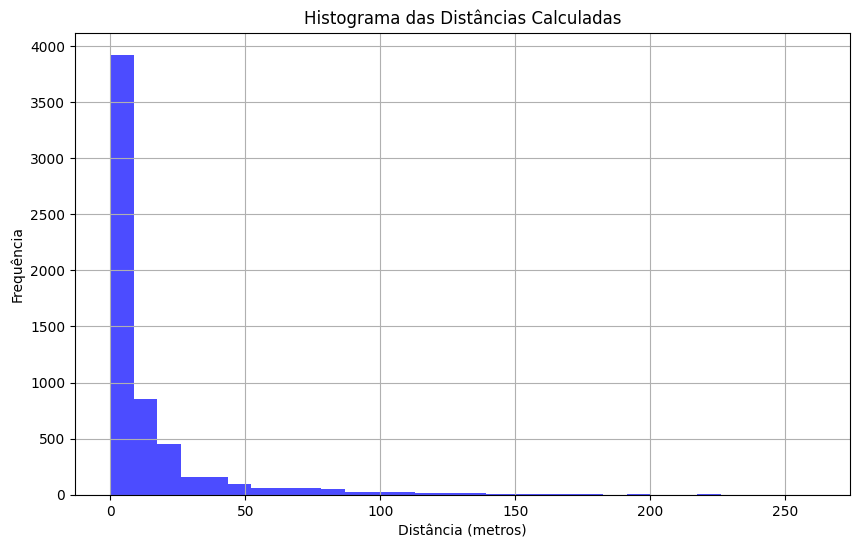

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='blue', alpha=0.7)
plt.title('Histograma das Distâncias Calculadas')
plt.xlabel('Distância (metros)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

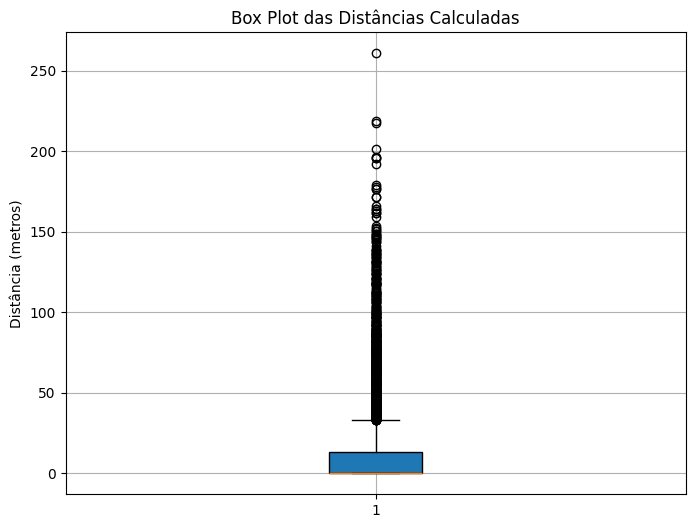

In [14]:
plt.figure(figsize=(8, 6))
plt.boxplot(distances, vert=True, patch_artist=True)
plt.title('Box Plot das Distâncias Calculadas')
plt.ylabel('Distância (metros)')
plt.grid(True)
plt.show()

# Visualização do mapa

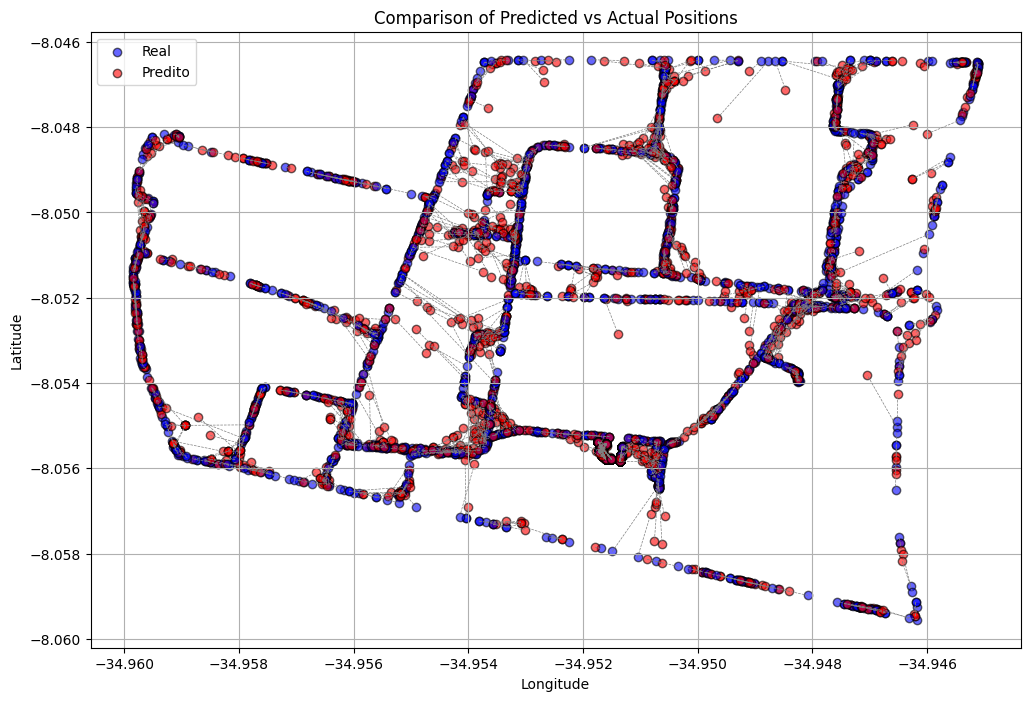

In [15]:
def plot_comparison_map(y_true, y_pred):
    # Configurar a figura e o eixo
    fig, ax = plt.subplots(figsize=(12, 8))

    # Desenhar cada par de pontos reais e preditos
    for real, pred in zip(y_true, y_pred):
        # Pontos reais em azul
        ax.scatter(real[1], real[0], color='blue', label='Real', alpha=0.6, edgecolor='black')
        # Pontos preditos em vermelho
        ax.scatter(pred[1], pred[0], color='red', label='Predito', alpha=0.6, edgecolor='black')
        # Linha entre real e predito
        ax.plot([real[1], pred[1]], [real[0], pred[0]], 'gray', linestyle='--', linewidth=0.5)

    # Configurações de exibição
    ax.set_title('Comparison of Predicted vs Actual Positions')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)
    
    # Adicionar legendas apenas uma vez
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Mostrar o gráfico
    plt.show()

plot_comparison_map(y_val.values, predictions)

In [18]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim + 1),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(2,)),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

optimizer_gen = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
optimizer_disc = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)

discriminator = build_discriminator()
discriminator.compile(optimizer=optimizer_disc, loss='binary_crossentropy', metrics=['accuracy'])

generator = build_generator(5)  # Latent dim

# Combine models
z = layers.Input(shape=(5,))
x_input = layers.Input(shape=(1,))
gen_input = layers.Concatenate()([z, x_input])
gen_y = generator(gen_input)  # Generator now also takes x_input
combined_input = layers.Concatenate()([x_input, gen_y])
valid = discriminator(combined_input)
combined = tf.keras.Model([x_input, z], valid)
combined.compile(optimizer=optimizer_gen, loss='binary_crossentropy')

def train(epochs, batch_size=128):
    x_data = np.linspace(-10, 10, 1000)
    y_data = 2 * x_data + 3 + np.random.normal(0, 2, x_data.shape)

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        idx = np.random.randint(0, x_data.shape[0], batch_size)
        x_batch = x_data[idx].reshape(-1, 1)
        y_batch = y_data[idx].reshape(-1, 1)
        noise = np.random.normal(0, 1, (batch_size, 5))
        
        gen_y_batch = generator.predict(np.hstack((noise, x_batch)))  # Provide x values as input
        d_loss_real = discriminator.train_on_batch(np.hstack((x_batch, y_batch)), valid)
        d_loss_fake = discriminator.train_on_batch(np.hstack((x_batch, gen_y_batch)), fake)
        
        g_loss = combined.train_on_batch([x_batch, noise], valid)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, D loss: {0.5 * np.add(d_loss_real, d_loss_fake)[0]}, G loss: {g_loss}")

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(x_data, y_data, color='blue', label='Original Data')
    plt.title("Original Data Distribution")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.legend()

    plt.subplot(1, 2, 2)
    x_points = np.linspace(-10, 10, 1000).reshape(-1, 1)
    noise = np.random.normal(0, 1, (1000, 5))
    generated_y = generator.predict(np.hstack((noise, x_points)))
    plt.scatter(x_points, generated_y, color='orange', label='Generated Data')
    plt.title("Generated Data Distribution")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.legend()
    
    plt.show()

train(epochs=500, batch_size=128)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 0, D loss: 1.4556866884231567, G loss: [array(1.3845346, dtype=float32), array(1.3845346, dtype=float32), array(0.41015625, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step


KeyboardInterrupt: 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
Epoch 0, D loss: 0.7271392345428467, G loss: [array(0.99239737, dtype=float32), array(0.99239737, dtype=float32), array(0.48828125, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/ste

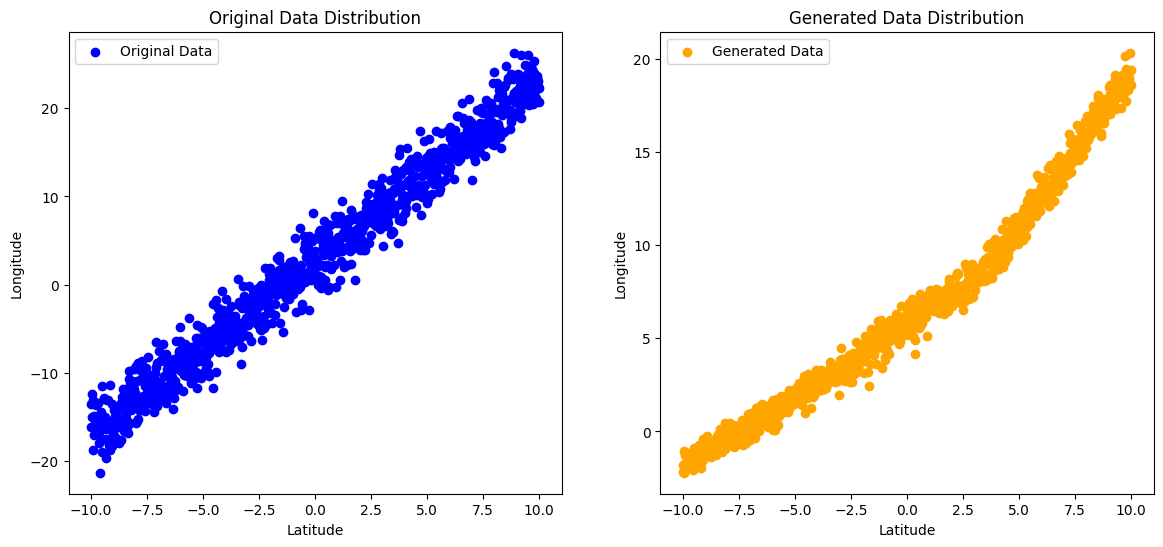

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim + 1),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(2,)),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

optimizer_gen = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
optimizer_disc = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)

discriminator = build_discriminator()
discriminator.compile(optimizer=optimizer_disc, loss='binary_crossentropy', metrics=['accuracy'])

generator = build_generator(5)  # Latent dim

# Combine models
z = layers.Input(shape=(5,))
x_input = layers.Input(shape=(1,))
gen_input = layers.Concatenate()([z, x_input])
gen_y = generator(gen_input)  # Generator now also takes x_input
combined_input = layers.Concatenate()([x_input, gen_y])
valid = discriminator(combined_input)
combined = tf.keras.Model([x_input, z], valid)
combined.compile(optimizer=optimizer_gen, loss='binary_crossentropy')

def train(epochs, batch_size=128):
    x_data = np.linspace(-10, 10, 1000)
    y_data = 2 * x_data + 3 + np.random.normal(0, 2, x_data.shape)

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        idx = np.random.randint(0, x_data.shape[0], batch_size)
        x_batch = x_data[idx].reshape(-1, 1)
        y_batch = y_data[idx].reshape(-1, 1)
        noise = np.random.normal(0, 1, (batch_size, 5))
        
        gen_y_batch = generator.predict(np.hstack((noise, x_batch)))  # Provide x values as input
        d_loss_real = discriminator.train_on_batch(np.hstack((x_batch, y_batch)), valid)
        d_loss_fake = discriminator.train_on_batch(np.hstack((x_batch, gen_y_batch)), fake)
        
        g_loss = combined.train_on_batch([x_batch, noise], valid)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, D loss: {0.5 * np.add(d_loss_real, d_loss_fake)[0]}, G loss: {g_loss}")

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(x_data, y_data, color='blue', label='Original Data')
    plt.title("Original Data Distribution")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.legend()

    plt.subplot(1, 2, 2)
    x_points = np.linspace(-10, 10, 1000).reshape(-1, 1)
    noise = np.random.normal(0, 1, (1000, 5))
    generated_y = generator.predict(np.hstack((noise, x_points)))
    plt.scatter(x_points, generated_y, color='orange', label='Generated Data')
    plt.title("Generated Data Distribution")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.legend()
    
    plt.show()

train(epochs=1000, batch_size=128)


In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Preprocessing
def preprocess_data(df):
    # Select features (adjust as needed)
    features = ['lat_x', 'lon_x', 'cch', 'azimuth', 'delay_1', 'delay_2', 'delay_3', 'lat_y', 'lon_y', 'indoor', 'rssi_value']
    
    # One-hot encode categorical features
    df['indoor'] = df['indoor'].astype(int)  # Convert boolean to int

    # Normalize numerical features
    scaler = StandardScaler()
    df[features] = scaler.fit_transform(df[features])
    
    return df[features].values, scaler

dataset = pd.read_csv('data/train_dataset.csv')
data, scaler = preprocess_data(dataset)

# Define the GAN
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(data.shape[1], activation='tanh'))
    return model

def build_discriminator(input_shape):
    model = Sequential()
    model.add(Dense(512, input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator((data.shape[1],))

discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

gan_input = Input(shape=(latent_dim,))
generated_data = generator(gan_input)
validity = discriminator(generated_data)
combined = Model(gan_input, validity)
combined.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# Training the GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        # Training the discriminator
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_data = data[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        synthetic_data = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(synthetic_data, np.zeros((batch_size, 1)))

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Training the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

train_gan(epochs=300, batch_size=64)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.7768437266349792] [D accuracy: 32.03125] [G loss: [array(0.7381878, dtype=float32), array(0.7381878, dtype=float32), array(0.515625, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Preprocessing
def preprocess_data(df):
    # Include all features
    features = df.columns.tolist()
    
    # One-hot encode categorical features if any (example shown for 'indoor')
    df['indoor'] = df['indoor'].astype(int)  # Convert boolean to int

    # Normalize numerical features
    scaler = StandardScaler()
    df[features] = scaler.fit_transform(df[features])
    
    return df[features].values, scaler

dataset = pd.read_csv('data/train_dataset.csv')
data, scaler = preprocess_data(dataset)

# Define the GAN
def build_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(output_dim, activation='tanh'))
    return model

def build_discriminator(input_shape):
    model = Sequential()
    model.add(Dense(512, input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

latent_dim = 100
generator = build_generator(latent_dim, data.shape[1])
discriminator = build_discriminator((data.shape[1],))

discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

gan_input = Input(shape=(latent_dim,))
generated_data = generator(gan_input)
validity = discriminator(generated_data)
combined = Model(gan_input, validity)
combined.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# Training the GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        # Training the discriminator
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_data = data[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        synthetic_data = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(synthetic_data, np.zeros((batch_size, 1)))

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Training the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

train_gan(epochs=10000, batch_size=64)

# Function to generate synthetic data
def generate_synthetic_data(generator, latent_dim, num_samples, scaler=None):
    # Generate random noise
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    
    # Generate synthetic data
    synthetic_data = generator.predict(noise)
    
    # Inverse transform the synthetic data if scaler is provided
    if scaler:
        synthetic_data = scaler.inverse_transform(synthetic_data)
    
    return synthetic_data

# Number of synthetic samples you want to generate
num_samples = 1000

# Generate synthetic data
synthetic_data = generate_synthetic_data(generator, latent_dim, num_samples, scaler)

# Convert synthetic data to a DataFrame for better visualization
synthetic_data_df = pd.DataFrame(synthetic_data, columns=dataset.columns)

# Display the first few rows of the synthetic data
synthetic_data_df.head()


ValueError: could not convert string to float: 'BTS_1_1'

In [31]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('data/train_normalized_dataset.csv')

# Define the number of synthetic samples you want to generate
n_samples = 1000  # Adjust this number as needed

# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

# Initialize dictionary to store synthetic data
synthetic_data = {}

# Generate synthetic data for numeric columns using Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=0)  # Adjust n_components as needed
gmm.fit(data[numeric_cols])
synthetic_data.update(dict(zip(numeric_cols, np.transpose(gmm.sample(n_samples=n_samples)[0]))))

# Generate synthetic data for categorical columns using random sampling
for col in categorical_cols:
    synthetic_data[col] = np.random.choice(data[col].dropna().unique(), size=n_samples)

# Convert the dictionary to a DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Save the synthetic data to a new CSV file
synthetic_df.to_csv('synthetic_data.csv', index=False)

print("Synthetic data generated and saved to 'synthetic_data.csv'.")


Synthetic data generated and saved to 'synthetic_data.csv'.
